# Cluster analysis (K-Means, Agglomerative clustering and DBSCAN) 

We apply K-Means algorithm on a toy dataset and test its limitations, as well as use the elbow method and silhouette coefficient to determine the appropriate number of clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(clf, axes, confidence=True):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_ = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plot confidence scores for samples
    if confidence:
        y_decision = clf.decision_function(X_).reshape(x0.shape)
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    return

def plot_dataset_(X, y, axes, x1_index=0, x2_index=1, labels=[]):
    for item, style in zip(set(y), ["bs", "g^", "yo", "rv", "c<", "m<"]):
        plt.plot(X[:, 0][y==item], X[:, 1][y==item], style)
    if axes != []:
        plt.axis(axes)
    plt.grid(True, which='both')
    if labels != []:
        plt.xlabel(labels[x1_index], fontsize=12)
        plt.ylabel(labels[x2_index], fontsize=12)
    else:
        plt.xlabel(r"$x_1$", fontsize=12)
        plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
    return

def plot_dataset(X, y, title, x1_index=0, x2_index=1, labels=[]):
    plot_dataset_(X, y, [], x1_index=x1_index, x2_index=x2_index, labels=labels)
    plt.title(title)
    plt.show()
    return

def plot_kmeans_results(clf, X, y, title="", axes=[]):
    if axes == []:
        for i in [0,1]:
            min_x = min(X[:,i])
            max_x = max(X[:,i])
            delta_x = (max_x-min_x)/20
            axes += [min_x-delta_x, max_x+delta_x]
    plot_predictions(clf, axes, confidence=False)
    plot_dataset_(X, y, axes)
    try:
        centroids_x = [x[0] for x in clustering.cluster_centers_]
        centroids_y = [x[1] for x in clustering.cluster_centers_]
        plt.plot(centroids_x, centroids_y, "k+", mew=3, ms=12)
    except:
        pass
    plt.title(title)
    plt.show()
    return

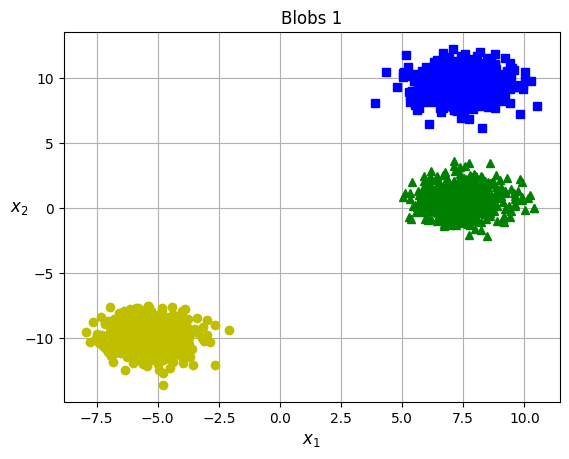

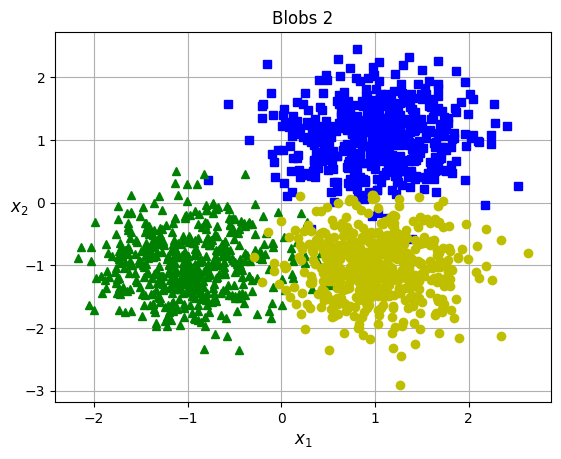

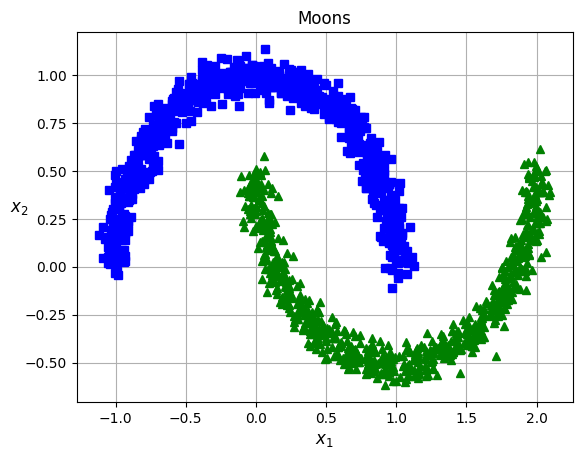

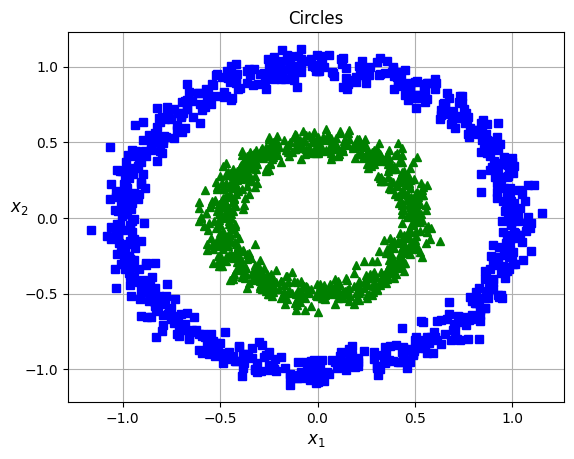

In [ ]:
# import generated datasets
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

# create toy datasets
n_samples = 1500
data_blobs_1 = make_blobs(n_samples=n_samples, random_state=8)
data_blobs_2 = make_blobs(n_samples=n_samples, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=0.5, random_state=8)
data_moons = make_moons(n_samples=n_samples, noise=.05)
data_circles = make_circles(n_samples=n_samples, factor=0.5, noise=.05)

# plot toy datasets
for data, title in zip([data_blobs_1, data_blobs_2, data_moons, data_circles ], ["Blobs 1", "Blobs 2", "Moons", "Circles"]):
    plot_dataset(data[0], data[1], title)

Original values: [0 0 0 ... 0 2 2]
Clustering with K-Means: [2 2 2 ... 2 1 1]


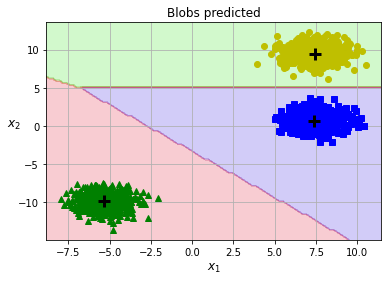

Centroid of each cluster: [[ 7.41429427  0.67834951]
 [-5.31738211 -9.81080765]
 [ 7.47871593  9.43027105]]


In [ ]:
## Calculate clustering with KMeans

from sklearn.cluster import KMeans

# set clustering algorithm
clustering = KMeans(n_clusters=3)
# train and predict from data
target_predicted = clustering.fit_predict(data_blobs_1[0])

# print results of prediction
print("Original values:", data_blobs_1[1])
print("Clustering with K-Means:", target_predicted)

# plot predicted labels
plot_kmeans_results(clustering, data_blobs_1[0], target_predicted, title="Blobs predicted", axes=[])

# print centroids
print("Centroid of each cluster:", clustering.cluster_centers_)

Original values: [1 0 2 ... 2 1 0]
Clustering with K-Means: [2 0 1 ... 1 2 0]


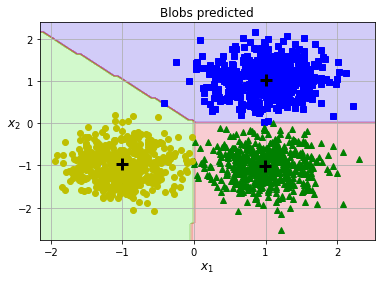

Centroid of each cluster: [[ 1.00531292  1.03187871]
 [ 0.99892741 -1.00997278]
 [-1.00437458 -0.97576421]]
SSE: 468.92038714347166
N. iterations 2


In [ ]:
## Calculate clustering with KMeans

from sklearn.cluster import KMeans

# set clustering algorithm
clustering = KMeans(n_clusters=3)
# train and predict from data
target_predicted = clustering.fit_predict(data_blobs_2[0])

# print results of prediction
print("Original values:", data_blobs_2[1])
print("Clustering with K-Means:", target_predicted)

# plot predicted labels
plot_kmeans_results(clustering, data_blobs_2[0], target_predicted, title="Blobs predicted", axes=[])

# print centroids
print("Centroid of each cluster:", clustering.cluster_centers_)
print("SSE:", clustering.inertia_)
print("N. iterations", clustering.n_iter_)

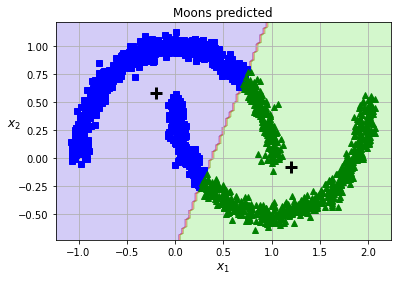

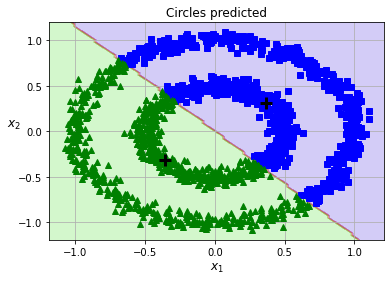

In [ ]:
# Does it work well for clusters with complex shapes?     
for data, n_clusters, title in zip([data_moons, data_circles], [2, 2], ["Moons", "Circles"]):
    clustering = KMeans(n_clusters=n_clusters)
    target_predicted = clustering.fit_predict(data[0])
    plot_kmeans_results(clustering, data[0], target_predicted, axes=[], title=title+" predicted")

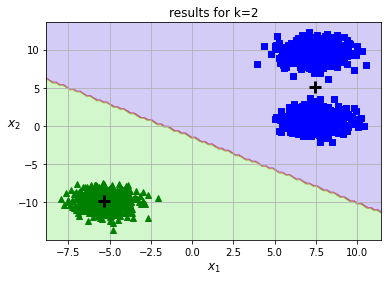

SSE:  22109.85690368839


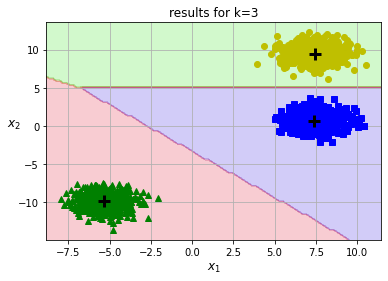

SSE:  2959.7867290413533


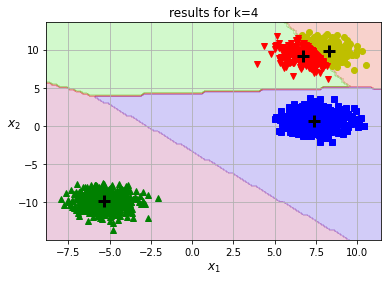

SSE:  2601.4346432446205


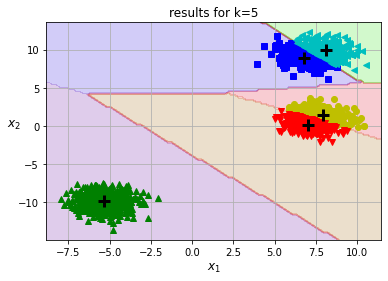

SSE:  2271.4294873748017


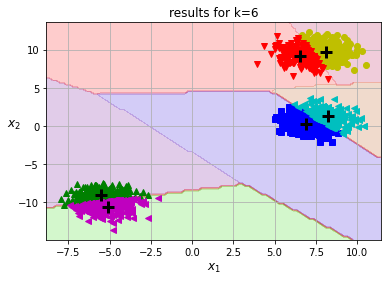

SSE:  1956.5591965048998


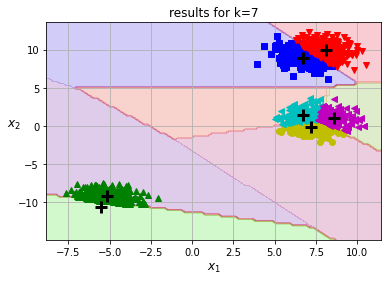

SSE:  1746.8259824461188


In [ ]:
# Test with different numbers of clusters
for n_clusters in range(2,8):
    clustering = KMeans(n_clusters=n_clusters)
    target_predicted = clustering.fit_predict(data_blobs_1[0])
    plot_kmeans_results(clustering, data_blobs_1[0], target_predicted, axes=[], title="results for k="+str(n_clusters))
    print("SSE: ", clustering.inertia_)

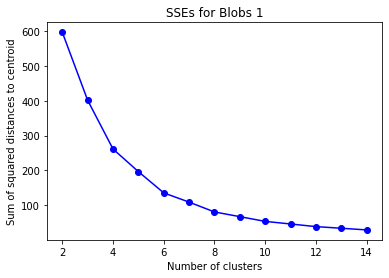

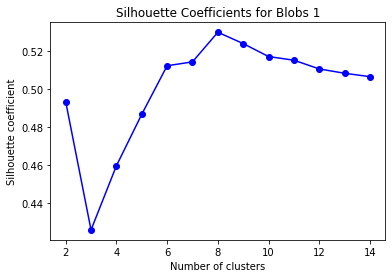

In [ ]:
from sklearn.metrics import silhouette_score

###### ELBOW METHOD

def get_SSE(data, clustering_algorithm, max_clusters=15):
    SSE = []
    ### calculate SSE for each number of clusters, from 2 to max_clusters
    for k in range(2,max_clusters):
        # set the clusterng algorithm
        model = clustering_algorithm(n_clusters=k)
        # train and predict from data
        model.fit_predict(data)
        # add SSE to the list of SSEs
        SSE.append(model.inertia_)
    return SSE

def plot_SSE(data, clustering_algorithm, title="", max_clusters=15):
    SSE = get_SSE(data, clustering_algorithm, max_clusters=max_clusters)
    plt.plot(range(2,max_clusters), SSE, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances to centroid')
    plt.title(title)
    plt.show()
    return

###### SILHOUETTE COEFFICIENTS METHOD

def get_silhouette_score(data, clustering_algorithm, max_clusters=15):
    silhouette_coefficients = []
    ### calculate silhouette score for each number of clusters, from 1 to max_clusters
    for k in range(2,max_clusters):
        # set the clusterng algorithm
        model = clustering_algorithm(n_clusters=k)
        # train and predict from data
        model.fit_predict(data)
        # calculate silhouette score for the current number of clusters
        score = silhouette_score(data, model.labels_)
        # add silhouette score to the list of silhouette scores
        silhouette_coefficients.append(score)
    return silhouette_coefficients

def plot_silhouette_score(data, clustering_algorithm, title="", max_clusters=15):
    sil_scores = get_silhouette_score(data, clustering_algorithm, max_clusters=max_clusters)
    plt.plot(range(2, max_clusters), sil_scores, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette coefficient')
    plt.title(title)
    plt.show()
    return

######

# plot SSEs for blobs 1 dataset
plot_SSE(data_moons[0], KMeans, title="SSEs for Blobs 1")

# plot silhouette_scores for blobs 1 dataset
plot_silhouette_score(data_moons[0], KMeans, title="Silhouette Coefficients for Blobs 1")

We now test Agglomerative clustering algorithm using scipy

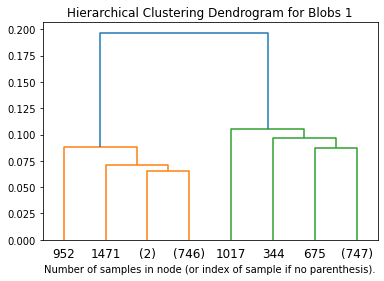

In [ ]:
import scipy.cluster.hierarchy as shc

def plot_dendrogram(data, title="", **kwargs):
    shc.dendrogram(shc.linkage(data, method='single'), **kwargs)
    plt.title(title)
    plt.xlabel("Number of samples in node (or index of sample if no parenthesis).")
    plt.show()
    return

# plot the top three levels of the dendrogram
plot_dendrogram(data_circles[0], truncate_mode='level', p=3, title="Hierarchical Clustering Dendrogram for Blobs 1")


Original values: [0 0 0 ... 0 2 2]
Clustering with Agglomerative Clustering: [0 0 0 ... 0 1 1]


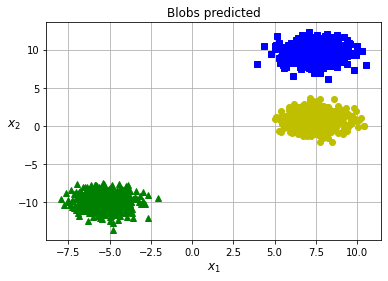

In [ ]:
## Calculate clustering with Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
target_predicted = clustering.fit_predict(data_blobs_1[0])

print("Original values:", data_blobs_1[1])
print("Clustering with Agglomerative Clustering:", target_predicted)

plot_dataset(data_blobs_1[0], target_predicted, title="Blobs predicted")

Original values: [0 0 0 ... 0 2 2]
Clustering with Agglomerative Clustering: [2 1 0 ... 0 2 1]


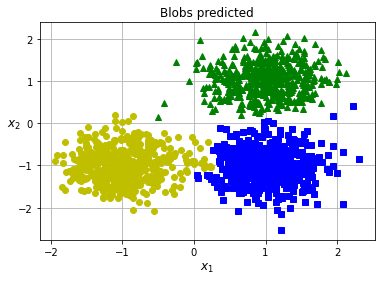

In [ ]:
plot_dataset(data_blobs_2[0], target_predicted, title="Blobs predicted")

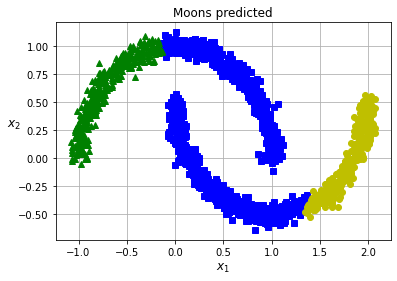

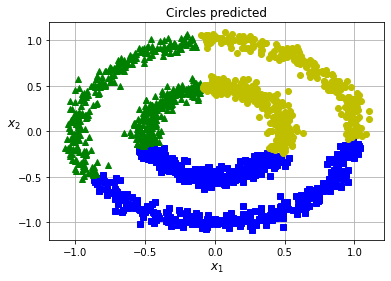

In [ ]:
# How does it work with mixed data types?

for data, n_clusters, title in zip([data_moons, data_circles], [3, 3], ["Moons", "Circles"]):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    target_predicted = clustering.fit_predict(data[0])
    plot_dataset(data[0], target_predicted, title=title+" predicted")


Now we test DBSCAN and compute clustering using toy dataset

Original values: [0 0 0 ... 0 2 2]
Clustering with DBSCAN: [0 0 0 ... 0 2 2]


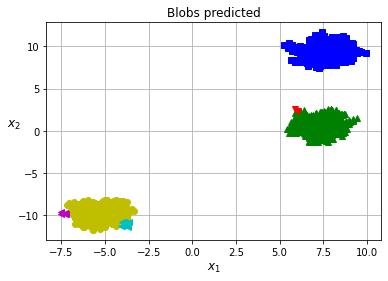

In [ ]:
## Calculate clustering with DBSCAN

from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=5)
target_predicted = clustering.fit_predict(data_blobs_1[0])

print("Original values:", data_blobs_1[1])
print("Clustering with DBSCAN:", target_predicted)

plot_dataset(data_blobs_1[0], target_predicted, title="Blobs predicted")

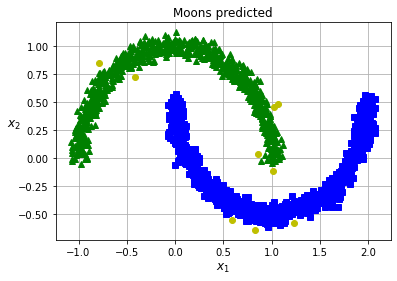

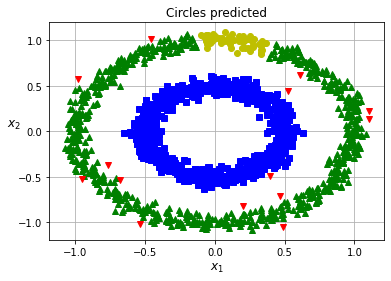

In [ ]:
for data, title in zip([data_moons, data_circles], ["Moons", "Circles"]):
    clustering = DBSCAN(eps=0.07, min_samples=5)
    target_predicted = clustering.fit_predict(data[0])
    plot_dataset(data[0], target_predicted, title=title+" predicted")

Original values: [1 0 2 ... 2 1 0]
Clustering with DBSCAN: [0 1 0 ... 0 0 1]


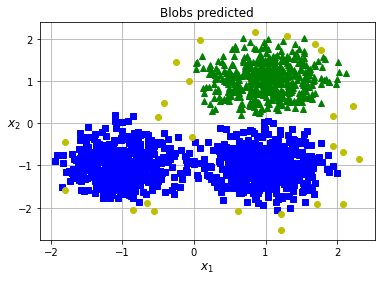

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2)
target_predicted = clustering.fit_predict(data_blobs_2[0])

print("Original values:", data_blobs_2[1])
print("Clustering with DBSCAN:", target_predicted)

plot_dataset(data_blobs_2[0], target_predicted, title="Blobs predicted")

Evaluate clustering performances using external and internal metrics

In [ ]:
from sklearn import metrics

def print_cluster_external_metrics(test_labels, predicted_labels, prefix=""):
    ARI = metrics.adjusted_rand_score(test_labels, predicted_labels)
    NMI = metrics.normalized_mutual_info_score(test_labels, predicted_labels, average_method='arithmetic')
    print(prefix+"ARI:", "{:.3f}".format(ARI), "NMI:", "{:.3f}".format(NMI))
    return

n_clusters = 3
clustering = KMeans(n_clusters=n_clusters)
target_predicted = clustering.fit_predict(data_blobs_1[0])

# get metrics
print_cluster_external_metrics(data_blobs_1[1], target_predicted, prefix="## Ext. metrics on Blobs 1 for "+str(n_clusters)+" clusters ## ")


## Ext. metrics on Blobs 1 for 3 clusters ## ARI: 1.000 NMI: 1.000


In [ ]:
print_cluster_external_metrics(data_circles[1], target_predicted, prefix="## Ext. metrics on Circles for "+str(n_clusters)+" clusters ## ")


## Ext. metrics on Circles for 3 clusters ## ARI: 0.999 NMI: 0.996


### K-Means ###


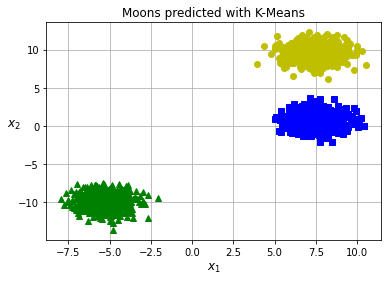

Average Silhouette Score: 0.829


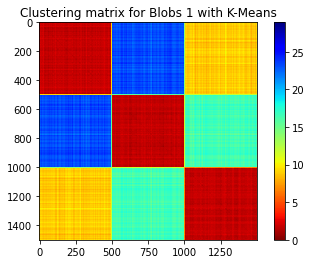

### DBSCAN ###


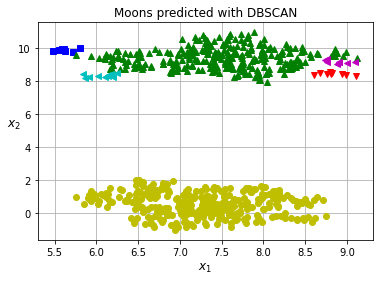

Average Silhouette Score: -0.292


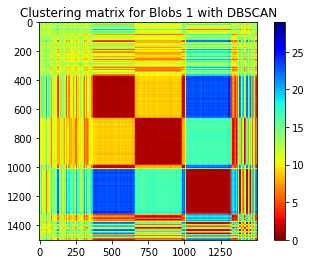

### Hierarchical ###


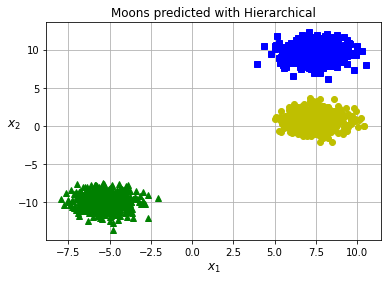

Average Silhouette Score: 0.829


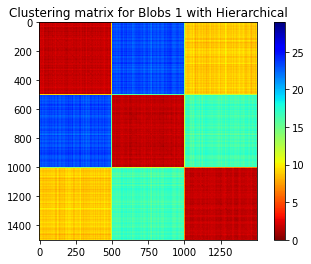

In [ ]:
from sklearn.metrics import silhouette_score

###### CLUSTERING MATRIX
from sklearn.metrics.pairwise import pairwise_distances

# helper function that sorts some data given the cluster labels
def sort_data(data, cluster_labels):
    sorting_indexes = np.argsort(cluster_labels)
    sorted_data = data[sorting_indexes]
    return sorted_data

def get_clustering_matrix(data, model):
    #fit model on data
    cluster_labels = model.fit_predict(data)
    # sort data accordingly to cluster labels
    sorted_data = sort_data(data, cluster_labels)
    # calculate distances between samples
    distance_matrix = pairwise_distances(sorted_data)
    return distance_matrix

# plot a distance matrix
def plot_clustering_matrix(data, model, title=""):
    distance_matrix = get_clustering_matrix(data, model)
    figure, axes = plt.subplots()
    image = axes.imshow(distance_matrix, cmap='jet_r')
    figure.colorbar(image)
    plt.title(title)
    plt.show()
    return

######

for clustering, title in zip([KMeans(n_clusters=3), DBSCAN(eps=0.2), AgglomerativeClustering(n_clusters=3, linkage='single')], ["K-Means", "DBSCAN", "Hierarchical"]):
    print("###", title, "###")
    # train and predict from data
    target_predicted = clustering.fit_predict(data_blobs_1[0])
    # plot result of clustering
    plot_dataset(data_blobs_1[0], target_predicted, title="Moons predicted with "+title)
    # print Average Silhouette Score
    s_score = silhouette_score(data_blobs_1[0], clustering.labels_)
    print("Average Silhouette Score:", "{:.3f}".format(s_score))
    # plot clustering matrix
    plot_clustering_matrix(data_blobs_1[0], clustering, title="Clustering matrix for Blobs 1 with "+title)